# Удаляем точки с недопустимыми NaN

In [1]:
import pandas as pd

from utils import definitions as defs
from utils import visualization as viz

In [2]:
df = pd.read_excel(defs.ETLED_DATA_PATH_step_2)

In [3]:
# для визуализации распределения по классами
norm_old = (df[defs.LABEL] == defs.LABELS[0]).sum()
benign_tumor_old = (df[defs.LABEL] == defs.LABELS[1]).sum()
malignant_tumor_old = (df[defs.LABEL] == defs.LABELS[2]).sum()

### 2. Возраст

In [4]:
df = df[df[defs.QUESTION_2].notnull()]  # 567 - 2 = 565

### 5. В какой семье Вы выросли?

In [5]:
df = df[df[defs.QUESTION_5].isin(defs.ANSWERS_5)]  # 565 - 1 = 564

### 12. Сколько человек живут вместе с Вами?

In [6]:
df = df[df[defs.QUESTION_12].isin(defs.ANSWERS_12)]  # 564 - 2 = 562

### 15. Есть ли у Вас домашние питомцы? (да/нет)

In [7]:
df = df[df[defs.QUESTION_15].isin([defs.YES, defs.NO])]  # 562 - 1 = 561

### 16. В течение последних 7 дней, как часто Вы практиковали тяжелые физические нагрузки?

In [8]:
df = df[df[defs.QUESTION_16].isin(defs.ANSWERS_16_17_18)]  # 561 - 2 = 569

### 17. В течение последних 7 дней, как часто Вы практиковали умеренные физические нагрузки?

In [9]:
df = df[df[defs.QUESTION_17].isin(defs.ANSWERS_16_17_18)]  # 569 - 10 = 559

### 22. Как долго Вы проживаете в этом месте? (в годах)

In [10]:
df = df[df[defs.QUESTION_22].notnull()]  # 559 - 4 = 555

In [11]:
# для визуализации распределения по классами
norm_new = (df[defs.LABEL] == defs.LABELS[0]).sum()
benign_tumor_new = (df[defs.LABEL] == defs.LABELS[1]).sum()
malignant_tumor_new = (df[defs.LABEL] == defs.LABELS[2]).sum()

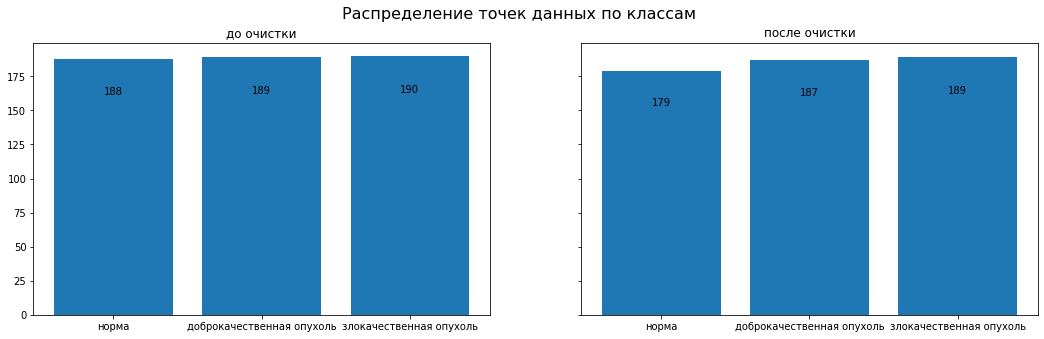

In [12]:
viz.plot_distribution(
    norm_old, benign_tumor_old, malignant_tumor_old,
    norm_new, benign_tumor_new, malignant_tumor_new,
)

In [13]:
df.to_excel(excel_writer=defs.ETLED_DATA_PATH_step_3, index=False)